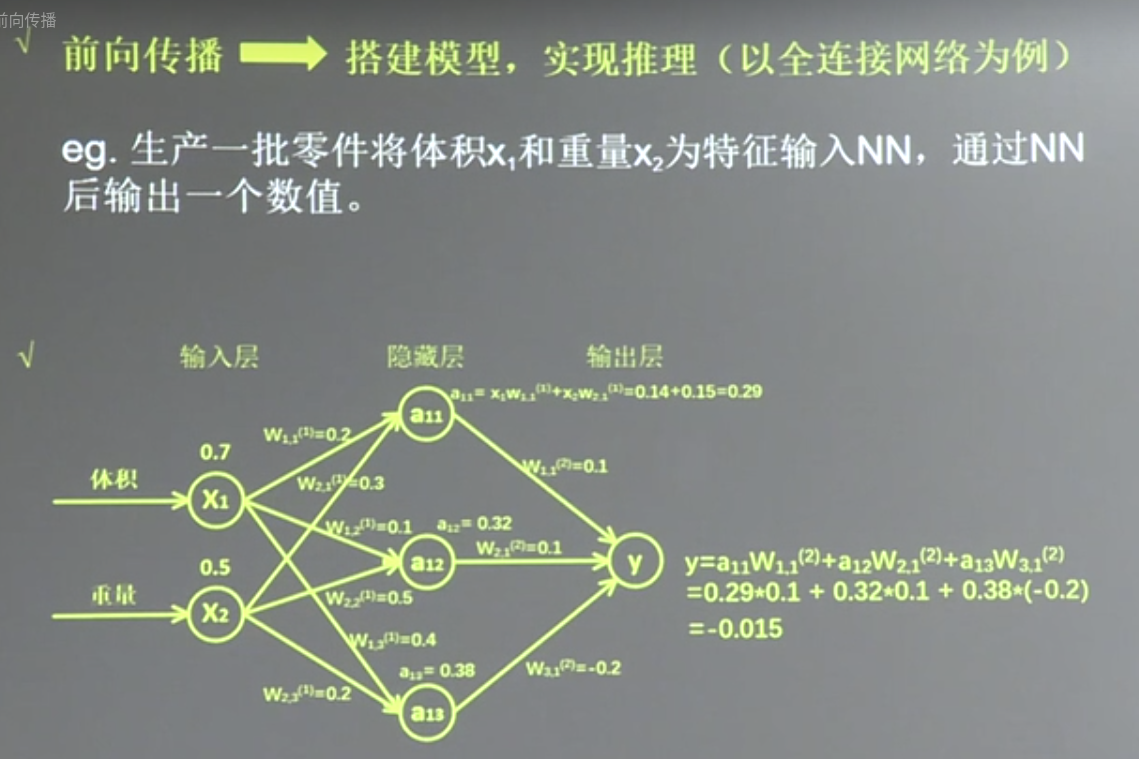

In [23]:
#coding:utf8
import tensorflow as tf
import numpy as np


In [24]:
BATCH_SIZE = 8
seed = 23455
rng = np.random.RandomState(seed)
X = rng.rand(32, 2)
Y = [[int(x0 + x1 <1)] for (x0, x1) in X]
print("X: ", X)
print("Y; ", Y)

X:  [[0.83494319 0.11482951]
 [0.66899751 0.46594987]
 [0.60181666 0.58838408]
 [0.31836656 0.20502072]
 [0.87043944 0.02679395]
 [0.41539811 0.43938369]
 [0.68635684 0.24833404]
 [0.97315228 0.68541849]
 [0.03081617 0.89479913]
 [0.24665715 0.28584862]
 [0.31375667 0.47718349]
 [0.56689254 0.77079148]
 [0.7321604  0.35828963]
 [0.15724842 0.94294584]
 [0.34933722 0.84634483]
 [0.50304053 0.81299619]
 [0.23869886 0.9895604 ]
 [0.4636501  0.32531094]
 [0.36510487 0.97365522]
 [0.73350238 0.83833013]
 [0.61810158 0.12580353]
 [0.59274817 0.18779828]
 [0.87150299 0.34679501]
 [0.25883219 0.50002932]
 [0.75690948 0.83429824]
 [0.29316649 0.05646578]
 [0.10409134 0.88235166]
 [0.06727785 0.57784761]
 [0.38492705 0.48384792]
 [0.69234428 0.19687348]
 [0.42783492 0.73416985]
 [0.09696069 0.04883936]]
Y;  [[1], [0], [0], [1], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1]]


In [25]:
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

#W1 = tf.placeholder(tf.float32, shape=(2, 3))
#W2 = tf.placeholder(tf.float32, shape=(3, 1))

W1 = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
W2 = tf.Variable(tf.random_normal([3, 1], stddev=1, seed=1))



In [26]:
# forward
a = tf.matmul(x, W1)
y = tf.matmul(a, W2)

# backward
loss = tf.reduce_mean(tf.square(y-y_))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
#train_step = tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss)
#train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print("W1: ", sess.run(W1))
    print("W2: ", sess.run(W2))
    
    # Train
    STEPS = 3000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 500 == 0:
            total_loss = sess.run(loss, feed_dict={x:X, y_:Y})
            print("After %d training steps, loss on all data is %g"  % (i, total_loss))
    print("W1: ", sess.run(W1))
    print("W2: ", sess.run(W2))
            

            
    #sess.run(a, feed_dict={X:[[0.7, 0.5]], W1:[[0.2, 0.1, 0.4], [0.3, 0.5, 0.2]]})
    #sess.run(y, feed_dict={W2: [[0.1], [0.1], [-0.2]], X:[[0.7, 0.5]], W1:[[0.2, 0.1, 0.4], [0.3, 0.5, 0.2]]})
   # print("a= ", sess.run(a, feed_dict={x:[[0.7, 0.5]]}))
    #print("y= ", sess.run(y, feed_dict={x:[[0.7, 0.5]]}))


W1:  [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
W2:  [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]
After 0 training steps, loss on all data is 5.13118
After 500 training steps, loss on all data is 0.429111
After 1000 training steps, loss on all data is 0.409789
After 1500 training steps, loss on all data is 0.399923
After 2000 training steps, loss on all data is 0.394146
After 2500 training steps, loss on all data is 0.390597
W1:  [[-0.7000663   0.91363174  0.0895357 ]
 [-2.3402493  -0.14641264  0.58823055]]
W2:  [[-0.06024268]
 [ 0.91956186]
 [-0.06820709]]
